# Final Project
Kalyn Howes & Chloe VanCory

COSC 311

12.15.21

Showing the effectiveness of several machine-learning algorithms on our Spotify data.

##### Imports

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import copy
import tqdm
from collections import Counter
from sklearn.metrics import confusion_matrix

### Class knnalg
Implementing the k nearest neighbors algorithm.

In [2]:
# Class with internal parameter k and methods train and predict
class knnalg:
    def __init__(self, k):
        self.k = k
        
    # i.The train method should take in an array of pre-labeled data and store them to be used in the kNN calculation later.
    # training the algorithm based on already found data
    def train(self, data, labels):
        self.data = data
        self.labels = labels
        
    # ii. The predict method should take in a single data point (of the same dimension as those used in training) 
    # and return the label of the kNN decision. Keep in mind that, in general, you may have to choose between multiple labels. 
    # In this case, ties are possible, but you can just decide to break them randomly or increase k to get more votes
    # send in a test point for it to be classified
    def predict(self, x):
        # need to find k closest neighbors to the point w the Euclidean norm
        # pair up each distance with the label of its point
        distances = [ (norm(x - self.data[i]), self.labels[i]) for i in range(len(self.data))]
        # print('Distances: ', distances)
        
        # order all the distances
        k_nearest = sorted(distances)
        #print('k_nearest: ', distances)
        
        # determine the labels of the top k points & do majority vote
        return max(Counter([p[1] for p in k_nearest[:k]]))

### Helper Functions:

In [3]:
# Splits a given data set (randomly) into testing and training subsets.
def divideSets(p,data):
    copydata = copy.deepcopy(data)
    # print(copydata)
    np.random.shuffle(copydata)
    list1 = copydata[:int(p*len(copydata))]
    list2 = copydata[int(p*len(copydata)):]
    #print('List 1: \n', list1)
    #print('\nList 2: \n',list2)
    
    return (list1, list2)

In [4]:
# norm: Finds the Euclidean norm of a set of points.
def norm(x):
    return np.sqrt(np.sum(x**2))

In [5]:
# find number of predictions that were correct
def correct_predictions(x, y):
    num_same = 0
    i = 0
    for l in x:
        # print(f'L: {l}')
        # print(f'P: {y[i]}')
        if l == y[i]:
            num_same = num_same + 1
            # print('num_same++')
        i = i + 1
        
    return num_same

In [6]:
# function for knn prediction:
# parameters include k, p, and data, x
# returns number of correct predictions

def prediction_nine_features(k, p, x):
    #print(f'k: {k}, p: {p}')
    knn = knnalg(k)
    n = len(x)
    rets = divideSets(p, x)
    list1 = np.array(rets[0])
    list2 = np.array(rets[1])

    # need to get the data in one array & the labels in another
    data1 = np.array([[t[0], t[1], t[2], t[3], t[4], t[5], t[6], t[7], t[8]] for t in list1], dtype=float)
    labels1 = np.array([t[9] for t in list1])
    #print('\nData (List1):\n', data1)
    #print('\nLabels (List1):\n', labels1)

    data2 = np.array([[t[0], t[1], t[2], t[3], t[4], t[5], t[6], t[7], t[8]] for t in list2], dtype=float)
    labels2 = np.array([t[9] for t in list2])
    #print('\nData (List2):\n', data2)
    #print('\nLabels (List2):\n', labels2)

    knn.train(data1, labels1)
    predictions_labels = []

    for i in tqdm.tqdm(range(len(data2))):
        predictions_labels.append(knn.predict(data2[i]))

    # want predictions with their points
    predictions = [ (data2[i], predictions_labels[i]) for i in range(len(predictions_labels))]
    #print(predictions)

    # Confusion Matrix Stuff
    # print(f'\np = {p:1.1}')
    # cf = confusion_matrix(labels2, predictions_labels)
    # np.set_printoptions(threshold=np.inf)
    # #print('Confusion Matrix: \n', cf)
    
    # heat map
    # sns.set_theme()
    # sns.heatmap(cf)
    
    return correct_predictions(labels2, predictions_labels)

### Prepping Spotify Data

In [7]:
songs = pd.read_csv('Data/Spotify.csv', header=0)
print(f'Data Information:\nShape: {songs.shape}')
songs.head()

Data Information:
Shape: (1556, 23)


,Index,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,...,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
0,1,1,8,2021-07-23--2021-07-30,Beggin',"48,633,449",Måneskin,3377762,3Wrjm47oTz2sjIgck11l5e,"['indie rock italiano', 'italian pop']",...,0.714,0.8,-4.808,0.0504,0.127,0.359,134.002,211560,0.589,B
1,2,2,3,2021-07-23--2021-07-30,STAY (with Justin Bieber),"47,248,719",The Kid LAROI,2230022,5HCyWlXZPP0y6Gqq8TgA20,['australian hip hop'],...,0.591,0.764,-5.484,0.0483,0.0383,0.103,169.928,141806,0.478,C#/Db
2,3,1,11,2021-06-25--2021-07-02,good 4 u,"40,162,559",Olivia Rodrigo,6266514,4ZtFanR9U6ndgddUvNcjcG,['pop'],...,0.563,0.664,-5.044,0.154,0.335,0.0849,166.928,178147,0.688,A
3,4,3,5,2021-07-02--2021-07-09,Bad Habits,"37,799,456",Ed Sheeran,83293380,6PQ88X9TkUIAUIZJHW2upE,"['pop', 'uk pop']",...,0.808,0.897,-3.712,0.0348,0.0469,0.364,126.026,231041,0.591,B
4,5,5,1,2021-07-23--2021-07-30,INDUSTRY BABY (feat. Jack Harlow),"33,948,454",Lil Nas X,5473565,27NovPIUIRrOZoCHxABJwK,"['lgbtq+ hip hop', 'pop rap']",...,0.736,0.704,-7.409,0.0615,0.0203,0.0501,149.995,212000,0.894,D#/Eb


In [8]:
songs['Chord'].unique()

array(['B', 'C#/Db', 'A', 'D#/Eb', 'G#/Ab', 'F#/Gb', 'C', 'D', 'A#/Bb',
       'G', 'E', 'F', ' '], dtype=object)

In [9]:
genres = songs['Genre']
print(genres)

0                  ['indie rock italiano', 'italian pop']
1                                  ['australian hip hop']
2                                                 ['pop']
3                                       ['pop', 'uk pop']
4                           ['lgbtq+ hip hop', 'pop rap']
                              ...                        
1551                       ['dance pop', 'pop', 'uk pop']
1552             ['sertanejo', 'sertanejo universitario']
1553    ['dance pop', 'electropop', 'pop', 'post-teen ...
1554                       ['brega funk', 'funk carioca']
1555                             ['pop', 'post-teen pop']
Name: Genre, Length: 1556, dtype: object


Need to determine the number of classes we have / how to classify songs with more than one genre:

Create a list of umbrella genres and fit each song into them. Then create a new column in the dataframe that holds the umbrella genre for each song (row).

In [10]:
umbrella_genres = ['indie rock', 'alternative', 'dance pop', 'latin', 'k-pop', 'reggaeton', 'alternative rock', 'comic', 'alt z',
                   'modern rock', 'melodic rap', 'folk', 'grunge', 'singer-songwriter', 'classic rock', 'edm', 'country',
                   'funk', 'pop rock', 'indie', 'metal', 'soul', 'trap', 'new wave', 'punk', 'boy band', 'swing', 'brooklyn drill',
                   'rock', 'hip hop', 'r&b', 'pop', 'rap', 'classical', 'psychedelic', 'Brazilian', 'easy listening', 'show tunes', 'jazz']

# create dictionary (in case the genres will need to be numbered): dict = { 1: 'indie rock', 2: 'alternative'}
dict_genres = {}
count = 1
for u in umbrella_genres:
    dict_genres[count] = u
    count += 1

print(f'Dictionary of Umbrella Genres: \n{dict_genres}')

Dictionary of Umbrella Genres: 
{1: 'indie rock', 2: 'alternative', 3: 'dance pop', 4: 'latin', 5: 'k-pop', 6: 'reggaeton', 7: 'alternative rock', 8: 'comic', 9: 'alt z', 10: 'modern rock', 11: 'melodic rap', 12: 'folk', 13: 'grunge', 14: 'singer-songwriter', 15: 'classic rock', 16: 'edm', 17: 'country', 18: 'funk', 19: 'pop rock', 20: 'indie', 21: 'metal', 22: 'soul', 23: 'trap', 24: 'new wave', 25: 'punk', 26: 'boy band', 27: 'swing', 28: 'brooklyn drill', 29: 'rock', 30: 'hip hop', 31: 'r&b', 32: 'pop', 33: 'rap', 34: 'classical', 35: 'psychedelic', 36: 'Brazilian', 37: 'easy listening', 38: 'show tunes', 39: 'jazz'}


In [11]:
# assign each song to its umbrella genre
umbrella_songs = []

for g in genres:
    tracker = False # debugger: determining which songs are not getting an umbrella genre
    #print(f'g: {g}')
    
    # taking care of loads of random edge cases (songs with genres that are only held by very few instances)
    if g == "[]" or g == "" or g == " ":
        #print(f'EMPTY- ADDING: ?')
        umbrella_songs.append('?')
        tracker = True
    elif g.find("basshall") != -1 or g.find("tronica") != -1 or g.find("techno") != -1 or g.find("house") != -1:
        umbrella_songs.append("edm")
        tracker = True
    elif g.find("eurovision") != -1 or g.find("advocacy") != -1 or g.find("soundtrack") != -1:
        umbrella_songs.append("pop")
        tracker = True
    elif g.find("dream smp") != -1:
        umbrella_songs.append("classical")
        tracker = True
    elif g.find("weirdcore") != -1 or g.find("psych") != -1:
        umbrella_songs.append("psychedelic")
        tracker = True
    elif g.find("forro") != -1 or g.find("piseiro") != -1 or g.find("sertanejo") != -1:
        umbrella_songs.append("Brazilian")
        tracker = True 
    elif g.find("espanol") != -1 or g.find("mariachi") != -1 or g.find("mexican") != -1:
        umbrella_songs.append("latin")
        tracker = True  
    elif g.find("a cappella") != -1 or g.find("jawaiian") != -1:
        umbrella_songs.append("easy listening")
        tracker = True   
    else:
        # for each umbrella genre: if the umbrella genre is found in g, add it to the umbrella_songs
        for u in umbrella_genres:
            if g.find(u) != -1:
                #print(f'ADDING: {u}')
                umbrella_songs.append(u)
                tracker = True
                break # make sure only 1 u is being added to a g
    
    # tracking edge cases
    # if tracker == False:
    #     print(f'NOTHING ADDED for g: {g}')

In [12]:
# add umbrella genre column
songs = songs.assign(Umbrella_Genre = umbrella_songs)
songs.head()

,Index,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,...,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord,Umbrella_Genre
0,1,1,8,2021-07-23--2021-07-30,Beggin',"48,633,449",Måneskin,3377762,3Wrjm47oTz2sjIgck11l5e,"['indie rock italiano', 'italian pop']",...,0.8,-4.808,0.0504,0.127,0.359,134.002,211560,0.589,B,indie rock
1,2,2,3,2021-07-23--2021-07-30,STAY (with Justin Bieber),"47,248,719",The Kid LAROI,2230022,5HCyWlXZPP0y6Gqq8TgA20,['australian hip hop'],...,0.764,-5.484,0.0483,0.0383,0.103,169.928,141806,0.478,C#/Db,hip hop
2,3,1,11,2021-06-25--2021-07-02,good 4 u,"40,162,559",Olivia Rodrigo,6266514,4ZtFanR9U6ndgddUvNcjcG,['pop'],...,0.664,-5.044,0.154,0.335,0.0849,166.928,178147,0.688,A,pop
3,4,3,5,2021-07-02--2021-07-09,Bad Habits,"37,799,456",Ed Sheeran,83293380,6PQ88X9TkUIAUIZJHW2upE,"['pop', 'uk pop']",...,0.897,-3.712,0.0348,0.0469,0.364,126.026,231041,0.591,B,pop
4,5,5,1,2021-07-23--2021-07-30,INDUSTRY BABY (feat. Jack Harlow),"33,948,454",Lil Nas X,5473565,27NovPIUIRrOZoCHxABJwK,"['lgbtq+ hip hop', 'pop rap']",...,0.704,-7.409,0.0615,0.0203,0.0501,149.995,212000,0.894,D#/Eb,hip hop


# Machine Learning Algorithms

### Machine Learning Algorithm 1: KNN
For knn, think of each genre as a class.

#### Duration (only)
Lets try to use the knn algorithm to classify a song into one of the umbrella genres based on its duration.
I have a feeling this feature will not be the best predictor, but we must start somewhere.

In [13]:
k=3
knn = knnalg(k)

In [14]:
# need to bring in the duration as INTS not STRINGS
songs['Duration (ms)'][songs['Duration (ms)'] == ' '] = 0
songs['Duration (ms)'].astype(int)
durations = songs['Duration (ms)'].astype(int).values
#print(durations)

ugenres = songs['Umbrella_Genre'].values
#print(ugenres)

/tmp/ipykernel_44961/2988570709.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  songs['Duration (ms)'][songs['Duration (ms)'] == ' '] = 0


In [15]:
d = [ (durations[i], ugenres[i]) for i in range(len(ugenres))]

p = 0.6
n = len(d)
rets = divideSets(p, d)
list1 = rets[0] 
list2 = rets[1] 

# need to get the data in one array & the labels in another
data1 = [t[0] for t in list1]
labels1 = [t[1] for t in list1]
#print('\nData (List1):\n', data1)
#print('\nLabels (List1):\n', labels1)

data2 = [t[0] for t in list2]
labels2 = [t[1] for t in list2]
#print('\nData (List2):\n', data2)
#print('\nLabels (List2):\n', labels2)

k = 3
knn = knnalg(k)
knn.train(data1, labels1)
predictions_labels = []
for i in tqdm.tqdm(range(len(data2))):
    predictions_labels.append(knn.predict(data2[i]))

# want predictions with their points
predictions = [ (data2[i], predictions_labels[i]) for i in range(len(predictions_labels))]
#print(predictions)
print(f'\np = {p:1.1}')
cf = confusion_matrix(labels2, predictions_labels)
np.set_printoptions(threshold=np.inf)
#print('Confusion Matrix: \n', cf)

100%|██████████| 623/623 [00:04<00:00, 126.18it/s]


p = 0.6


<AxesSubplot:>

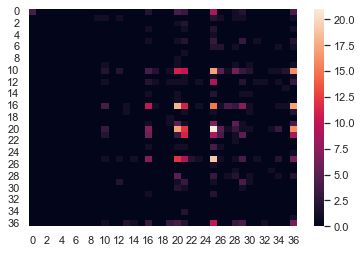

In [16]:
# heat map for confusion matrix
import seaborn as sns
sns.set_theme()
sns.heatmap(cf)

The most confusion lies between index 20 and 26 of the umbrella genres, which include the 'pop' label. This means many songs that are not pop are being classified as pop due to their duration.

#### Training w/ 9 Features (instead of 1):
Duration, Danceability, Acousticness, Energy, Liveness, Loudness, Speechiness, Tempo, Valence

In [17]:
# Data Manipulation: need to bring in features as floats not strings

import warnings
warnings.filterwarnings('ignore')

songs['Duration (ms)'][songs['Duration (ms)'] == ' '] = 0
duration = songs['Duration (ms)'].astype(int).values

songs['Danceability'][songs['Danceability'] == ' '] = 0
danceability = songs['Danceability'].astype(float).values

songs['Acousticness'][songs['Acousticness'] == ' '] = 0
acousticness = songs['Acousticness'].astype(float).values

songs['Energy'][songs['Energy'] == ' '] = 0
energy = songs['Energy'].astype(float).values

songs['Liveness'][songs['Liveness'] == ' '] = 0
liveness = songs['Liveness'].astype(float).values

songs['Loudness'][songs['Loudness'] == ' '] = 0
loudness = songs['Loudness'].astype(float).values

songs['Speechiness'][songs['Speechiness'] == ' '] = 0
speechiness = songs['Speechiness'].astype(float).values

songs['Tempo'][songs['Tempo'] == ' '] = 0
tempo = songs['Tempo'].astype(float).values

songs['Valence'][songs['Valence'] == ' '] = 0
valence = songs['Valence'].astype(float).values

In [18]:
ugenres = songs['Umbrella_Genre'].values
#print(ugenres)

# list of lists to hold data points for training
x = [ [duration[i], danceability[i], acousticness[i], energy[i], liveness[i], loudness[i], speechiness[i],
       tempo[i], valence[i], ugenres[i]] for i in range(len(ugenres))]

#### k = 1
Try different p values.

In [19]:
k = 1
accuracy_kone = [] # accuracy holder for k1

# calling function on p values 0.1, 0.2, 0.3, ... 0.9
p = 0.1
num = 0 # number of correct predictions to be added to the list
for i in range(1, 10):
    num = prediction_nine_features(k, p, x)
    print(f'For p = {p:0.1}, the number of correct predictions is {num}/{len(x)}')
    accuracy_kone.append(num/len(x))
    p = p + 0.1

100%|██████████| 1401/1401 [00:01<00:00, 765.13it/s]


For p = 0.1, the number of correct predictions is 155/1556


100%|██████████| 1245/1245 [00:03<00:00, 360.09it/s]


For p = 0.2, the number of correct predictions is 141/1556


100%|██████████| 1090/1090 [00:04<00:00, 252.31it/s]


For p = 0.3, the number of correct predictions is 146/1556


100%|██████████| 934/934 [00:04<00:00, 188.51it/s]


For p = 0.4, the number of correct predictions is 107/1556


100%|██████████| 778/778 [00:05<00:00, 150.64it/s]


For p = 0.5, the number of correct predictions is 96/1556


100%|██████████| 623/623 [00:05<00:00, 121.28it/s]


For p = 0.6, the number of correct predictions is 80/1556


100%|██████████| 467/467 [00:04<00:00, 99.03it/s] 


For p = 0.7, the number of correct predictions is 63/1556


100%|██████████| 312/312 [00:03<00:00, 87.02it/s]


For p = 0.8, the number of correct predictions is 41/1556


100%|██████████| 156/156 [00:02<00:00, 77.61it/s]

For p = 0.9, the number of correct predictions is 22/1556


#### k = 2

In [20]:
k = 2
accuracy_ktwo = []

# calling function on p values 0.1, 0.2, 0.3, ... 0.9
p = 0.1
num = 0 # number of correct predictions to be added to the list
for i in range(1, 10):
    num = prediction_nine_features(k, p, x)
    print(f'For p = {p:0.1}, the number of correct predictions is {num}/{len(x)}')
    accuracy_ktwo.append(num/len(x))
    p = p + 0.1

100%|██████████| 1401/1401 [00:01<00:00, 731.46it/s]


For p = 0.1, the number of correct predictions is 138/1556


100%|██████████| 1245/1245 [00:03<00:00, 355.92it/s]


For p = 0.2, the number of correct predictions is 113/1556


100%|██████████| 1090/1090 [00:04<00:00, 239.17it/s]


For p = 0.3, the number of correct predictions is 118/1556


100%|██████████| 934/934 [00:04<00:00, 187.89it/s]


For p = 0.4, the number of correct predictions is 99/1556


100%|██████████| 778/778 [00:05<00:00, 139.18it/s]


For p = 0.5, the number of correct predictions is 81/1556


100%|██████████| 623/623 [00:05<00:00, 105.91it/s]


For p = 0.6, the number of correct predictions is 74/1556


100%|██████████| 467/467 [00:04<00:00, 104.61it/s]


For p = 0.7, the number of correct predictions is 55/1556


100%|██████████| 312/312 [00:03<00:00, 91.28it/s]


For p = 0.8, the number of correct predictions is 40/1556


100%|██████████| 156/156 [00:01<00:00, 80.64it/s]

For p = 0.9, the number of correct predictions is 19/1556


#### k = 3

In [21]:
k = 3
accuracy_kthree = [] # accuracy holder for k3

# calling function on p values 0.1, 0.2, 0.3, ... 0.9
p = 0.1
num = 0 # number of correct predictions to be added to the list
for i in range(1, 10):
    num = prediction_nine_features(k, p, x)
    print(f'For p = {p:0.1}, the number of correct predictions is {num}/{len(x)}')
    accuracy_kthree.append(num/len(x))
    p = p + 0.1

100%|██████████| 1401/1401 [00:01<00:00, 722.82it/s]


For p = 0.1, the number of correct predictions is 94/1556


100%|██████████| 1245/1245 [00:03<00:00, 349.19it/s]


For p = 0.2, the number of correct predictions is 106/1556


100%|██████████| 1090/1090 [00:05<00:00, 198.77it/s]


For p = 0.3, the number of correct predictions is 107/1556


100%|██████████| 934/934 [00:05<00:00, 181.41it/s]


For p = 0.4, the number of correct predictions is 92/1556


100%|██████████| 778/778 [00:05<00:00, 145.62it/s]


For p = 0.5, the number of correct predictions is 72/1556


100%|██████████| 623/623 [00:05<00:00, 122.35it/s]


For p = 0.6, the number of correct predictions is 70/1556


100%|██████████| 467/467 [00:04<00:00, 104.84it/s]


For p = 0.7, the number of correct predictions is 45/1556


100%|██████████| 312/312 [00:03<00:00, 91.54it/s]


For p = 0.8, the number of correct predictions is 31/1556


100%|██████████| 156/156 [00:01<00:00, 81.01it/s]

For p = 0.9, the number of correct predictions is 21/1556


#### k = 4

In [22]:
k = 4 
accuracy_kfour = []

# calling function on p values 0.1, 0.2, 0.3, ... 0.9
p = 0.1
num = 0 # number of correct predictions to be added to the list
for i in range(1, 10):
    num = prediction_nine_features(k, p, x)
    print(f'For p = {p:0.1}, the number of correct predictions is {num}/{len(x)}')
    accuracy_kfour.append(num/len(x))

100%|██████████| 1401/1401 [00:01<00:00, 758.40it/s]


For p = 0.1, the number of correct predictions is 98/1556


100%|██████████| 1401/1401 [00:01<00:00, 754.87it/s]


For p = 0.1, the number of correct predictions is 103/1556


100%|██████████| 1401/1401 [00:01<00:00, 751.15it/s]


For p = 0.1, the number of correct predictions is 125/1556


100%|██████████| 1401/1401 [00:02<00:00, 655.30it/s]


For p = 0.1, the number of correct predictions is 139/1556


100%|██████████| 1401/1401 [00:02<00:00, 478.90it/s]


For p = 0.1, the number of correct predictions is 110/1556


100%|██████████| 1401/1401 [00:02<00:00, 591.30it/s]


For p = 0.1, the number of correct predictions is 112/1556


100%|██████████| 1401/1401 [00:02<00:00, 558.07it/s]


For p = 0.1, the number of correct predictions is 143/1556


100%|██████████| 1401/1401 [00:02<00:00, 666.95it/s]


For p = 0.1, the number of correct predictions is 158/1556


100%|██████████| 1401/1401 [00:01<00:00, 732.60it/s]

For p = 0.1, the number of correct predictions is 129/1556


#### k = 5

In [23]:
k = 5
accuracy_kfive = []

# calling function on p values 0.1, 0.2, 0.3, ... 0.9
p = 0.1
num = 0 # number of correct predictions to be added to the list
for i in range(1, 10):
    num = prediction_nine_features(k, p, x)
    print(f'For p = {p:0.1}, the number of correct predictions is {num}/{len(x)}')
    accuracy_kfive.append(num/len(x))
    p = p + 0.1

100%|██████████| 1401/1401 [00:01<00:00, 747.33it/s]


For p = 0.1, the number of correct predictions is 102/1556


100%|██████████| 1245/1245 [00:03<00:00, 330.70it/s]


For p = 0.2, the number of correct predictions is 97/1556


100%|██████████| 1090/1090 [00:04<00:00, 233.67it/s]


For p = 0.3, the number of correct predictions is 97/1556


100%|██████████| 934/934 [00:05<00:00, 179.30it/s]


For p = 0.4, the number of correct predictions is 78/1556


100%|██████████| 778/778 [00:05<00:00, 148.04it/s]


For p = 0.5, the number of correct predictions is 57/1556


100%|██████████| 623/623 [00:05<00:00, 124.34it/s]


For p = 0.6, the number of correct predictions is 56/1556


100%|██████████| 467/467 [00:04<00:00, 103.50it/s]


For p = 0.7, the number of correct predictions is 47/1556


100%|██████████| 312/312 [00:04<00:00, 77.42it/s]


For p = 0.8, the number of correct predictions is 15/1556


100%|██████████| 156/156 [00:02<00:00, 76.22it/s]

For p = 0.9, the number of correct predictions is 13/1556


#### The Learning Curve of KNN (6a)

Text(0.5, 1.0, 'Learning Curve for KNN')

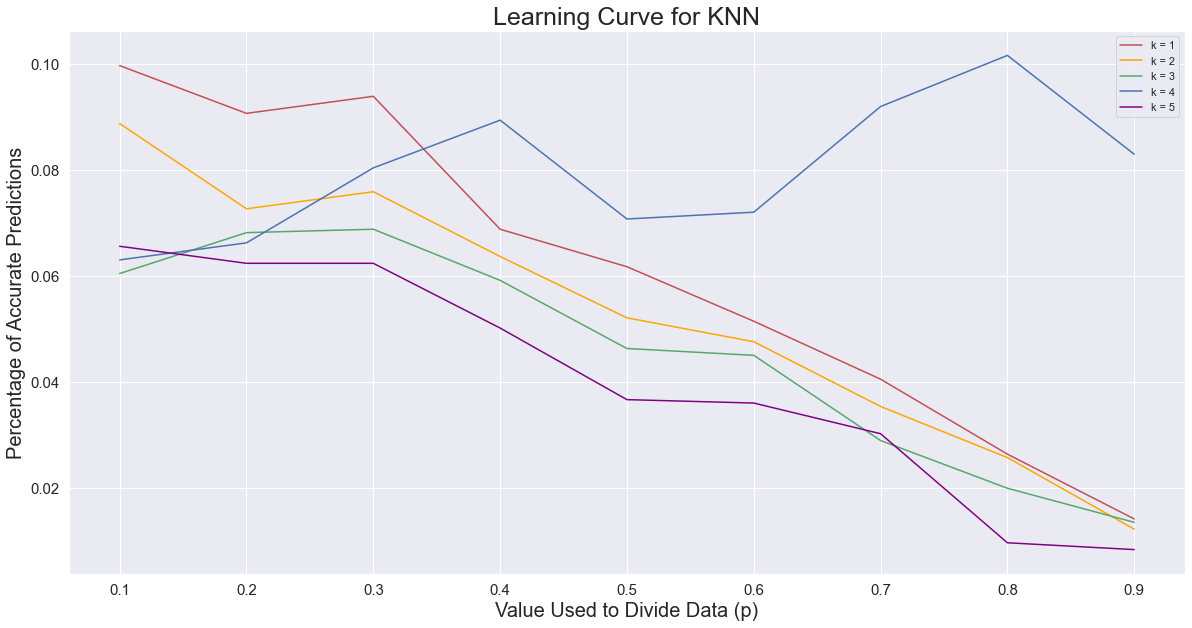

In [24]:
# 6a
# plot accuracies vs p value (with different k values as each line)
ps = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9] # p values
# print(accuracy_kone)
# print(accuracy_ktwo)
# print(accuracy_kthree)
# print(accuracy_kfour)
# print(accuracy_kfive)

# for re-sizing:
fig2 = plt.gcf()
fig2.set_size_inches(20, 10)

plt.plot(ps, accuracy_kone, color = 'r', label = 'k = 1')
plt.plot(ps, accuracy_ktwo, color = 'orange', label = 'k = 2')
plt.plot(ps, accuracy_kthree, color = 'g', label = 'k = 3')
plt.plot(ps, accuracy_kfour, color = 'b', label = 'k = 4')
plt.plot(ps, accuracy_kfive, color = 'purple', label = 'k = 5')
plt.legend(loc = 'upper right')
plt.xticks(size=15)
plt.yticks(size=15)
plt.xlabel('Value Used to Divide Data (p)', size = 20) # better name for these?
plt.ylabel('Percentage of Accurate Predictions', size = 20)
plt.title('Learning Curve for KNN', size=25)

### Machine Learning Algorithm 2: Decision Trees
For the decision trees, also think of each genre as a class.

#### Decision Tree Functions

In [39]:
# calculates & returns the Gini Index/Value (0-0.5)
# 0 = perfect split, 0.5 = 50/50 classes in each group
def get_gini(groups, classes):
    n = float(sum([len(g) for g in groups])) # count all samples at split point
    
    # sum weighted Gini index for each group
    gini = 0.0
    for g in groups:
        size = float(len(g))
        
        # avoid divide by zero
        if size == 0:
            continue
        score = 0.0
        
        # score the group based on the score for each class
        for class_val in classes:
            p = [row[-1] for row in g].count(class_val) / size
            score += p * p
            
        # weight the group score by its relative size
        gini += (1.0 - score) * (size / n)
        
    return gini
 
# separating a dataset into two lists of "rows" from the data
# parameters: the index of an attribute, split value for that attribute, data
# returns left and right lists
def test_split(i, val, dataset):
    left = list() # holds all "rows" with a value at the index < the split value
    right = list() # holds all "rows" with a value at the index >= the split value
    
    for d in dataset:
        if d[i] < val:
            left.append(d)
        else:
            right.append(d)
    return left, right
 
# finds the best split point for a dataset
# uses test_split to find all possible splits first, then uses Gini to determine the best
def best_split(dataset):
    class_vals = list(set(row[-1] for row in dataset))
    node_index, node_value, node_score, node_groups = 999, 999, 999, None # initalize data for node dictionary
    
    # for each index in the data
    for i in range(len(dataset[0])-1):
        # for each row in the data
        for row in dataset:
            groups = test_split(i, row[i], dataset)
            gini = get_gini(groups, class_vals)
            #print(f'X{i+1} < {row[i]:0.3} Gini={gini:.03}')
             
            if gini < node_score:
                node_index = i
                node_value = row[i]
                node_score = gini
                node_groups = groups

    return {'index':node_index, 'value':node_value, 'groups':node_groups} # dont need to return gini score

# returns most common output value in a list of rows
def common_value(group):
    outcomes = [row[-1] for row in group]
    return max(set(outcomes), key=outcomes.count)
 
# creates children splits for a node or creates a terminal node (no children)
# NO RETURN
def split(node, max_depth, min_size, depth):
    left, right = node['groups'] # splits 2 groups into left & right
    del(node['groups']) # get rid of current node that holds the groups (since we're splitting)

    # check for a no split 
    if not left or not right:
        node['left'] = node['right'] = common_value(left + right)
        return
    # check for max depth
    if depth >= max_depth:
        node['left'], node['right'] = common_value(left), common_value(right)
        return
    # process left child
    if len(left) <= min_size:
        node['left'] = common_value(left)
    else:
        node['left'] = best_split(left)
        split(node['left'], max_depth, min_size, depth+1)
    # process right child
    if len(right) <= min_size:
        node['right'] = common_value(right)
    else:
        node['right'] = best_split(right)
        split(node['right'], max_depth, min_size, depth+1)
        
    return 0
 
# build tree with recursive splitting
# parameters: data to be trained with, max tree depth, and minimum tree size
def build_tree(data, max_depth, min_size):
    root = best_split(data)
    split(root, max_depth, min_size, 1)
    return root
 
# prints the decision tree nicely
# NO RETURN
def print_tree(node, depth = 0):
    # isinstance - returns True if the input is the type, otherwise False
    # if the node is a dictionary
    if isinstance(node, dict):
        print('%s[X%d < %.3f]' % ((depth*' ', (node['index']+1), node['value'])))
        print_tree(node['left'], depth+1)
        print_tree(node['right'], depth+1)
    else:
        print('%s[%s]' % ((depth*' ', node)))
        
    return 0
     
# uses decision tree to predict a values 'class'
def predict(node, row):
    #print(f'node: {node}')
    # if less then, go left
    if row[node['index']] < node['value']:
        
        #print(f'node["left"] = {node["left"]}')
        #print(f'type: {type(node["left"])}')
        
        # if the node is a dictionary
        if isinstance(node['left'], dict):
            return predict(node['left'], row)
        else:
            return node['left']
        
    # if greather than or equal to, go right
    else:
        #print(f'node["right"] = {node["right"]}')
        #print(f'type: {type(node["right"])}')
        if isinstance(node['right'], dict):
            return predict(node['right'], row)
        else:
            return node['right']

#### Decision Tree on Spotify Data

##### Prepping Data (yet again)

In [26]:
# ugenres need to be numbers instead of strings:
ugenres = songs['Umbrella_Genre']
print(ugenres)

0       indie rock
1          hip hop
2              pop
3              pop
4          hip hop
           ...    
1551     dance pop
1552     Brazilian
1553     dance pop
1554          funk
1555           pop
Name: Umbrella_Genre, Length: 1556, dtype: object


In [27]:
count = 0
for g in ugenres.unique():
    ugenres[ugenres == g] = count
    count = count + 1
print(ugenres)

0        0
1        1
2        2
3        2
4        1
        ..
1551     3
1552    19
1553     3
1554    25
1555     2
Name: Umbrella_Genre, Length: 1556, dtype: object


##### Tree Work

In [28]:
x = [ [duration[i], danceability[i], acousticness[i], energy[i], liveness[i], loudness[i], speechiness[i],
       tempo[i], valence[i], ugenres[i]] for i in range(len(ugenres))]
#print(x)

##### Max Depth = 5

In [32]:
max_depth = 5
min_size = 1
tree = (build_tree(x, max_depth, min_size))

In [33]:
#print(tree)
#print_tree(tree)

split_dict = best_split(x)
print('Split:', split_dict['value'])

Split: 0.0719


In [40]:
# terminal node / "stump" - uses first split value as its value
# stump = {'index': 0, 'right': 1, 'value': split_dict['value'], 'left': 0}

# print(predict(tree, [211560, 0.714, 0.127, 0.8, 0.359, -4.808, 0.0504, 134.002, 0.589])) # should be 0 (indie rock)

# track expected & predicted for further analysis
expectations = []
predictions = []
for d in tqdm.tqdm(x):
    #print(d[:-1]) # dont include class at end
    prediction = (predict(tree, d[:-1]))
    #print(prediction)
    predictions.append(prediction)
    expectations.append(d[-1])
    #print(f'Expected: {d[-1]}, Predicted={prediction}')

    #print(predictions)

100%|██████████| 1556/1556 [00:00<00:00, 357098.76it/s]


In [49]:
# go through each prediction and see if it matches the expected value
num_correct = 0
for i in range(len(predictions)):
    if predictions[i] == expectations[i]:
        num = num + 1
        
accuracy_maxdepth5 = num / len(predictions)
print(accuracy_maxdepth5)

1.332262210796915


##### Max Depth = 10

In [51]:
max_depth = 10
tree = (build_tree(x, max_depth, min_size))

# track expected & predicted for further analysis
expectations = []
predictions = []
for d in tqdm.tqdm(x):
    #print(d[:-1]) # dont include class at end
    prediction = (predict(tree, d[:-1]))
    #print(prediction)
    predictions.append(prediction)
    expectations.append(d[-1])
    #print(f'Expected: {d[-1]}, Predicted={prediction}')

    #print(predictions)

100%|██████████| 1556/1556 [00:00<00:00, 320484.04it/s]


In [52]:
# go through each prediction and see if it matches the expected value
num_correct = 0
for i in range(len(predictions)):
    if predictions[i] == expectations[i]:
        num = num + 1
        
accuracy_maxdepth10 = num / len(predictions)
print(accuracy_maxdepth10)

1.9826478149100257


##### Max Depth = 15

In [53]:
max_depth = 15
tree = (build_tree(x, max_depth, min_size))

# track expected & predicted for further analysis
expectations = []
predictions = []
for d in tqdm.tqdm(x):
    #print(d[:-1]) # dont include class at end
    prediction = (predict(tree, d[:-1]))
    #print(prediction)
    predictions.append(prediction)
    expectations.append(d[-1])
    #print(f'Expected: {d[-1]}, Predicted={prediction}')

    #print(predictions)

100%|██████████| 1556/1556 [00:00<00:00, 210499.84it/s]


In [54]:
# go through each prediction and see if it matches the expected value
num_correct = 0
for i in range(len(predictions)):
    if predictions[i] == expectations[i]:
        num = num + 1
        
accuracy_maxdepth15 = num / len(predictions)
print(accuracy_maxdepth15)

2.946658097686375


##### Max Depth = 20

In [55]:
max_depth = 20
tree = (build_tree(x, max_depth, min_size))

# track expected & predicted for further analysis
expectations = []
predictions = []
for d in tqdm.tqdm(x):
    #print(d[:-1]) # dont include class at end
    prediction = (predict(tree, d[:-1]))
    #print(prediction)
    predictions.append(prediction)
    expectations.append(d[-1])
    #print(f'Expected: {d[-1]}, Predicted={prediction}')

    #print(predictions)

100%|██████████| 1556/1556 [00:00<00:00, 240124.25it/s]


In [56]:
# go through each prediction and see if it matches the expected value
num_correct = 0
for i in range(len(predictions)):
    if predictions[i] == expectations[i]:
        num = num + 1
        
accuracy_maxdepth20 = num / len(predictions)
print(accuracy_maxdepth20)

3.9460154241645244


##### Max Depth = 25

In [57]:
max_depth = 25
tree = (build_tree(x, max_depth, min_size))

# track expected & predicted for further analysis
expectations = []
predictions = []
for d in tqdm.tqdm(x):
    #print(d[:-1]) # dont include class at end
    prediction = (predict(tree, d[:-1]))
    #print(prediction)
    predictions.append(prediction)
    expectations.append(d[-1])
    #print(f'Expected: {d[-1]}, Predicted={prediction}')

    #print(predictions)

100%|██████████| 1556/1556 [00:00<00:00, 248253.53it/s]


In [58]:
# go through each prediction and see if it matches the expected value
num_correct = 0
for i in range(len(predictions)):
    if predictions[i] == expectations[i]:
        num = num + 1
        
accuracy_maxdepth25 = num / len(predictions)
print(accuracy_maxdepth25)

4.945372750642673


##### Plotting Accuracies vs Max Depths

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Learning Curve for Decision Tree')

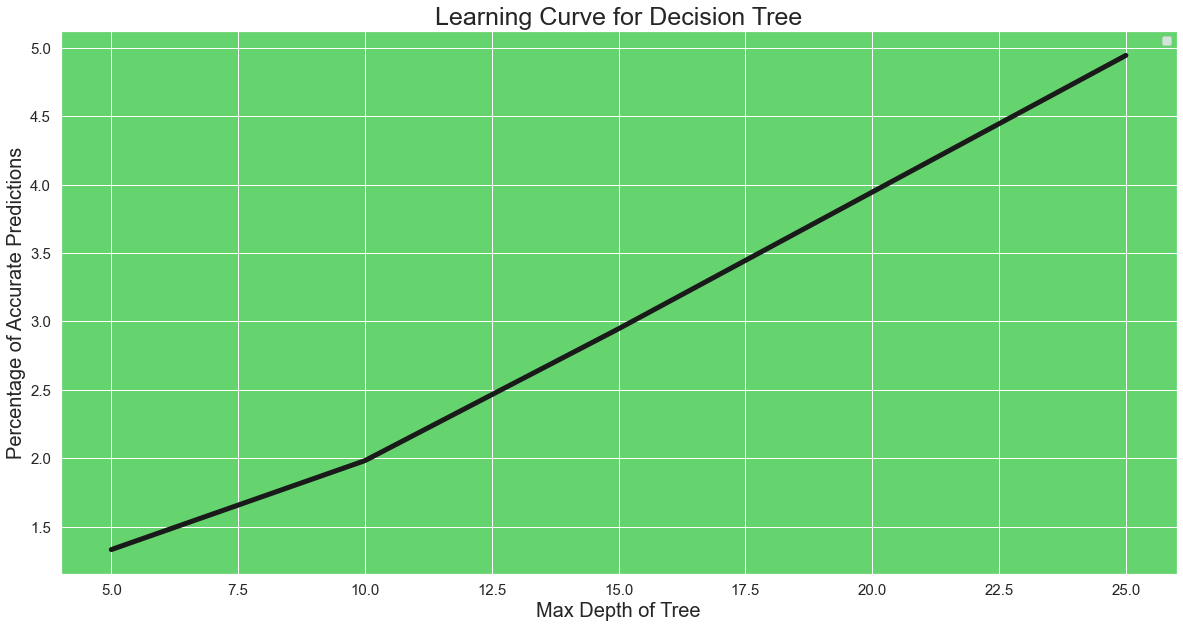

In [87]:
ds = [5, 10, 15, 20, 25] # max depths
accuracy_maxdepths = [accuracy_maxdepth5, accuracy_maxdepth10, accuracy_maxdepth15, accuracy_maxdepth20, accuracy_maxdepth25]

#fig = plt.figure()
#fig.patch.set_facecolor( color = (101/255, 211/255, 110/255))
ax = plt.gca()
ax.set_facecolor(color = (101/255, 211/255, 110/255))
fig2 = plt.gcf()
fig2.set_size_inches(20, 10)

plt.plot(ds, accuracy_maxdepths, linewidth = 5, color = 'k')
plt.legend(loc = 'upper right')
plt.xticks(size=15)
plt.yticks(size=15)
plt.xlabel('Max Depth of Tree', size = 20) # better name for these?
plt.ylabel('Percentage of Accurate Predictions', size = 20)
plt.title('Learning Curve for Decision Tree', size=25)

In [89]:
print_tree(tree)

[X7 < 0.072]
 [X3 < 0.683]
  [X4 < 0.277]
   [X1 < 177480.000]
    [X1 < 0.000]
     [9]
     [9]
    [34]
   [X6 < -5.542]
    [X9 < 0.767]
     [X2 < 0.625]
      [X3 < 0.490]
       [X6 < -6.755]
        [X9 < 0.224]
         [X1 < 190173.000]
          [X1 < 175721.000]
           [X1 < 168276.000]
            [X1 < 41867.000]
             [3]
             [3]
            [X1 < 174406.000]
             [1]
             [2]
           [X1 < 175721.000]
            [7]
            [7]
          [X6 < -9.887]
           [X1 < 209560.000]
            [2]
            [2]
           [X3 < 0.032]
            [8]
            [X1 < 325413.000]
             [X1 < 242253.000]
              [X1 < 211400.000]
               [X1 < 191307.000]
                [6]
                [X1 < 191307.000]
                 [6]
                 [6]
               [6]
              [X1 < 242253.000]
               [6]
               [6]
             [X1 < 355960.000]
              [1]
              [6]
     

0